In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [90]:
ONLINE_SHOPPERS_DATASET = "../content/sample_data/online_shoppers_intention.csv"

In [91]:
df = pd.read_csv(ONLINE_SHOPPERS_DATASET)

In [92]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

По данным ниже, видим, что пропусков в параметрах нет. Значит в датасете можно оставить все признаки.

In [94]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


Целевые данные распределены неравномерно. Класс "Не купил" гораздо объёмнее класса "Купил". В таких случаях модели можно не угадывать, а всегда относить данные к большему классу и общая точность будет высока. Для точного обучения в таком случае обычно сильнее штрафуют модель за ошибку на меньшем классе. Или генерируют данные меньшего класса для увеличения их процента в общем датасете.

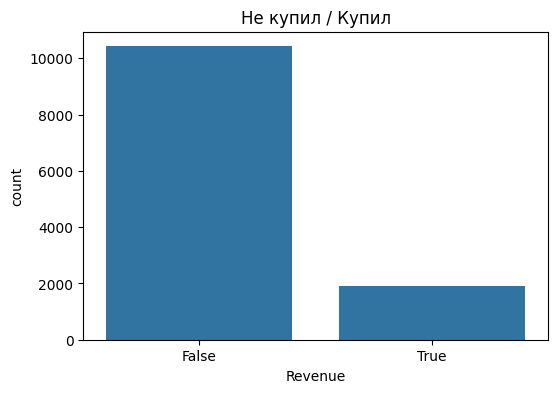

In [95]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', data=df)
plt.title('Не купил / Купил')
plt.show()


Наиболее сильная корреляция с целевым признаком у PageValues - это означает, что пользователь посещает страницы, которые наиболее вероятно приведут к покупке. Также есть отрицательная корреляция с признаками BounceRates (пользователь зашёл и сразу вышел) и ExitRates (пользователь ушел с сайта после просмотра страницы).

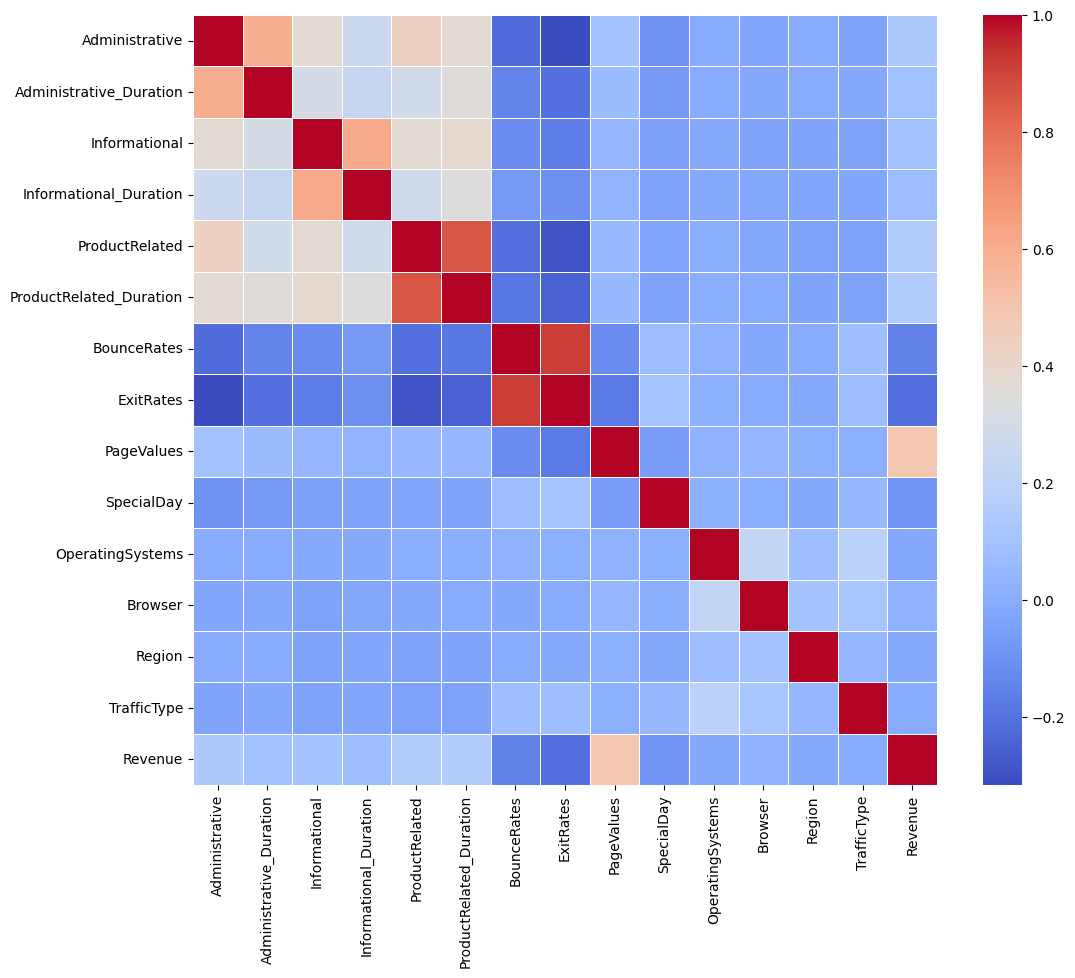

In [96]:
df_temp = df.copy()
df_temp['Revenue'] = df_temp['Revenue'].astype(int)

columns = df_temp.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 10))
sns.heatmap(df_temp[columns].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()

Преобразуем признаки Revenue и Weekend из boolean в числовой.

In [97]:
df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


Закодируем месяцы согласно их ествественной хронологии, чтобы сохранить порядок их следования друг за другом.

In [98]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [99]:
month_map = {
    'Feb': 2,
    'Mar': 3,
    'May': 5,
    'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}
df['Month'] = df['Month'].map(month_map)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


Система / Регион / Браузер никак не относятся друг к друг, нет худшего, нет лучшего, они просто разные, поэтому закодируем эти признаки методом One-Hot энкодинг. У этих признаков не такой большой набор значений и датасет не раздуется.

In [100]:
cat_columns = ['VisitorType',
            'OperatingSystems',
            'Browser',
            'Region',
            'TrafficType'
            ]
df = pd.get_dummies(df, columns=cat_columns)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


Масштабируем числовые признаки и приводим их к единому диапазону, чтобы модель не считала один важнее другого, а какбы рассматривала их одинаково.

In [101]:
num_columns = [
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'PageValues',
    'SpecialDay',
    'ExitRates'
]
scaler = StandardScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0.20,3.229316,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,False,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,0.00,1.171473,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,False,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0.20,3.229316,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,False,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.05,1.994610,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,False,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,0.02,0.142551,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,False,False


Разделяем данные на все признаки и целевой признак. Затем делим на обучающую и тестовую выборки. Применяем параметр stratify чтобы в выборках сохранZлись пропорции данных по целевому параметру.

In [53]:
from sklearn.model_selection import train_test_split

X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

Обучающая выборка: (9864, 65)
Тестовая выборка: (2466, 65)


Сначала обучим простую модель на основе алгоритма random forest. Применим стандартные настройки, чтобы в дальнейшем видеть динамику улучшения модели.

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

rf_simple = RandomForestClassifier(random_state=42)
rf_simple.fit(X_train, y_train)
y_pred_simple = rf_simple.predict(X_test)

Общая точность составила 90%, но если бы модель выбирала всегда результат "Не купил" точность была бы тоже высокой порядка 85%. Тоесть точность не намного выше базовой. Если смотреть только на менее многочисленный класс "Купил", то в рамках него точность составляет около 50% 193 -не угадано, 189 - угадано, что не есть хорошо.

Точность: 0.9014598540145985
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2084
           1       0.79      0.49      0.61       382

    accuracy                           0.90      2466
   macro avg       0.85      0.74      0.78      2466
weighted avg       0.89      0.90      0.89      2466



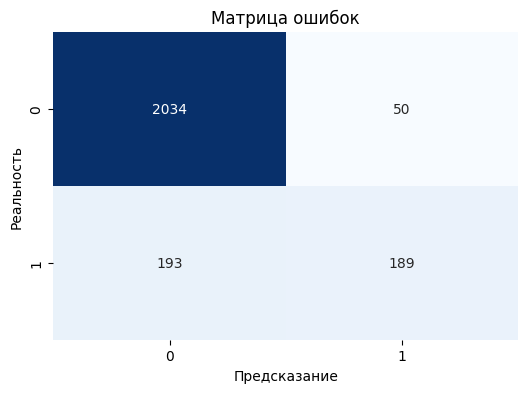

In [55]:
print("Точность:", accuracy_score(y_test, y_pred_simple))
print(classification_report(y_test, y_pred_simple))

cm = confusion_matrix(y_test, y_pred_simple)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Предсказание')
plt.ylabel('Реальность')
plt.title('Матрица ошибок')
plt.show()

Пробуем подобрать параметры модели вручную, но судя по результам получается только хуже. Тут была использована f1_macro метрика для оценки модели, потомучто датасет очень несбалансированный и если использовать простую точность, то модель просто будет смотреть на самый многочисленный класс.

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

Лучшие параметры: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


Точность: 0.8957826439578265
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2084
           1       0.77      0.47      0.58       382

    accuracy                           0.90      2466
   macro avg       0.84      0.72      0.76      2466
weighted avg       0.89      0.90      0.89      2466



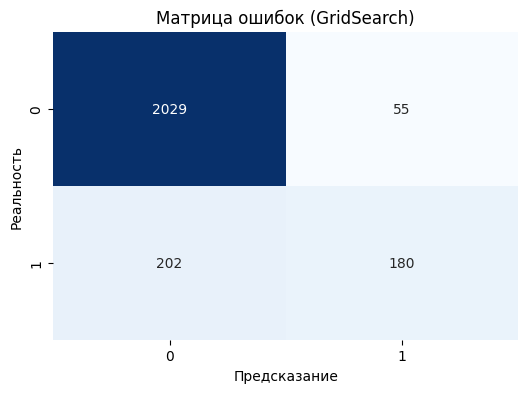

In [57]:
print("Точность:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Предсказание')
plt.ylabel('Реальность')
plt.title('Матрица ошибок')
plt.show()

У модели по прежнему плохая точность на малочисленном классе. Поэтому пробуем увеличить штрафование модели на малочисленном классе. Теперь модель не сможет выбирать всегда многочисленный класс, так как ошибка будет стоить дорого. Как видим этот метод дал огромный прирост в показателях модели. На классе "Купил" ошибка получиласть в 95 случаях, а вот правильный выбор был сделан уже в 287 случаях. Что составляет 75% правильных ответов вместо начальных 49%. Такой метод работает очень хорошо.

In [62]:
from sklearn.model_selection import GridSearchCV

rf_balanced = RandomForestClassifier(random_state=100, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf_balanced,
    param_grid=param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 100}


Точность: 0.8909164639091647
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2084
           1       0.62      0.75      0.68       382

    accuracy                           0.89      2466
   macro avg       0.79      0.83      0.81      2466
weighted avg       0.90      0.89      0.89      2466



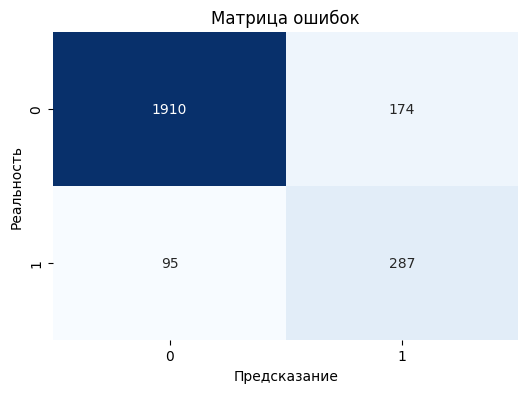

In [63]:
print("Точность:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Предсказание')
plt.ylabel('Реальность')
plt.title('Матрица ошибок')
plt.show()

Теперь для сравнения попробуем градиентный бустинг. Также применим алгоритм HistGradientBoostingClassifier, который поддерживает балансировку штрафов, взависимости от размерности класса, что дало огромный прирост в точности "Купил" в предыдущем способе. Результат получился ещё лучше. Данная модель ошибается лишь в 64 случаях на малочисленном классе и попадает в ответ в 318 случаях, что достигает 83%. Да, тут значительно выросла доля ошибки на большем множестве, но в данном случае не упустить потенциальных покупателей важнее.

In [72]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_balanced = HistGradientBoostingClassifier(random_state=100, class_weight='balanced')

param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'max_iter': [100, 200]
}

grid_search = GridSearchCV(
    estimator=gb_balanced,
    param_grid=param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")

best_gb = grid_search.best_estimator_
y_pred_gb = best_gb.predict(X_test)

Лучшие параметры: {'learning_rate': 0.05, 'max_depth': 3, 'max_iter': 100}


Точность: 0.864963503649635
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      2084
           1       0.54      0.83      0.66       382

    accuracy                           0.86      2466
   macro avg       0.75      0.85      0.79      2466
weighted avg       0.90      0.86      0.88      2466



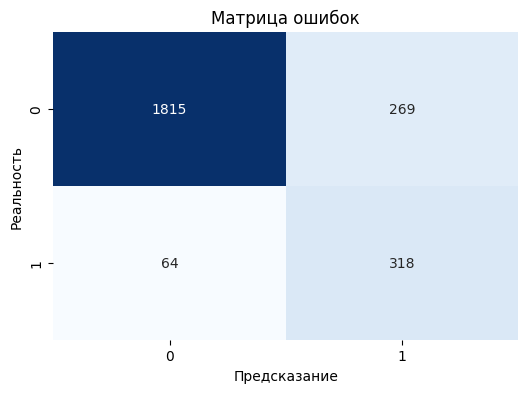

In [70]:
print("Точность:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Предсказание')
plt.ylabel('Реальность')
plt.title('Матрица ошибок')
plt.show()